## Непрерывные случайные величины. Функция распределения и плотность распределения вероятностей. Равномерное и нормальное распределение. Центральная предельная теорема

#### Задача 1

Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

Подсказка. 1. Можно считать, что распределение массы коробки нормальное. 2. Найдите такое значение scale, для которого значение cdf(x=1, loc=1.06, scale=scale) близко к 0.05. Точности 0.0001 будет достаточно.

In [150]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

#### а) Среднее квадратическое отклонение массы коробки

$$D(X) = \sigma^2$$

Воспользуемся подсказкой из условия

In [8]:
for scale in np.linspace(0.02, 0.05, 10000):
    s = stats.norm.cdf(x=1, loc=1.06, scale=scale)
    if s > 0.05:
        print(f'Среднее квадратическое отклонение массы коробки: {round(scale, 6)}')
        break

Среднее квадратическое отклонение массы коробки: 0.036478


#### б) процент коробок, имеющих массу больше 1.1 кг

In [9]:
P = 1 - stats.norm.cdf(1.1, loc=1.06, scale=scale)
print(f'Процент коробок, имеющих массу больше 1.1 кг: {round(P * 100, 2)}%')

Процент коробок, имеющих массу больше 1.1 кг: 13.64%


#### Задача 2

Коробка содержит 30 конфет. Известно, что масса каждой конфеты распределена равномерно в промежутке от 12 до 14 граммов. Используя центральную предельную теорему, найти вероятность, что масса всей коробки будет: а) меньше 390 граммов, б) больше 395 граммов, в) от 380 до 400 граммов.

Массой самой коробки можно пренебречь.

Подсказка. Для равномерного распределения в промежутке [a, b]:
1. мат. ожидание равно (a + b) / 2,
2. дисперсия равна (b - a)^2 / 12.

In [13]:
candy_min = 12
candy_max = 14
n = 30
M = (candy_min + candy_max) / 2
D = (candy_max - candy_min)**2 / 12
print(f'Мат. ожидание: {M}, Дисперсия: {D}')

Мат. ожидание: 13.0, Дисперсия: 0.3333333333333333


In [14]:
loc = n * M
sigma = (n * D)**0.5

#### а) меньше 390 граммов

In [19]:
box1 = stats.norm.cdf(x=390, loc=loc, scale=sigma)
print(f'Вероятность, что масса всей коробки будет меньше 390 граммов: {box1}')

Вероятность, что масса всей коробки будет меньше 390 граммов: 0.5


#### б) больше 395 граммов

In [21]:
box2 = 1 - stats.norm.cdf(x=395, loc=loc, scale=sigma)
print(f'Вероятность, что масса всей коробки будет меньше 390 граммов: {round(box2, 4)}')

Вероятность, что масса всей коробки будет меньше 390 граммов: 0.0569


#### в) от 380 до 400 граммов

In [22]:
box3 = stats.norm.cdf(x=400, loc=loc, scale=sigma) - stats.norm.cdf(x=380, loc=loc, scale=sigma)
print(f'Вероятность, что масса всей коробки будет меньше 390 граммов: {round(box3, 4)}')

Вероятность, что масса всей коробки будет меньше 390 граммов: 0.9984


#### Задача 3

Продемонстрируйте действие центральной предельной теоремы на каком-нибудь распределении на ваш выбор (кроме нормального). Что для этого нужно сделать:
1. Выберите несколько значений n (например, 2, 5, 10, 50).
2. Для выбранного значения n сгенерируйте 1000 раз выборку размера n из выбранного вами распределения, посчитайте по этой выборке выборочное среднее.
3. Изобразите гистограмму из полученных 1000 значений выборочного среднего с аргументом density=True.
4. Поверх гистограммы нарисуйте функцию плотности нормального распределения с параметрами из ЦПТ (т.е. mu = M, sigma^2 = D / n, где M - мат. ожидание выбранного вами распределения,  D - его дисперсия).

При достаточно большом n гистограмма должна соответствовать построенной функции плотности.

In [172]:
n = [4, 15, 40]

In [173]:
# Сформируем наши выборки и посчитаем выборочное среднее
samples = []
df = 55

In [174]:
for i in n:
    for _ in range(1000):
        sample = chi2.rvs(df, size=i)
        samples.append(sample.mean())

In [175]:
len(samples)

3000

In [179]:
steps = np.arange(35.,70.,0.5)

In [177]:
M = np.mean(samples)
D = np.std(samples)

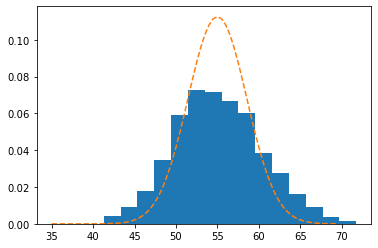

In [180]:
# Построим гистограмму и нарисуем функцию плотности для выборки - 5
mu = M
sigma = (D / n[0])**0.5
ox = steps
oy = np.array(stats.norm(loc = M, scale = D).pdf(ox))
plt.hist(samples[0:1000], bins = 15, density = True)
plt.plot(ox, oy, linestyle = 'dashed')
plt.show()

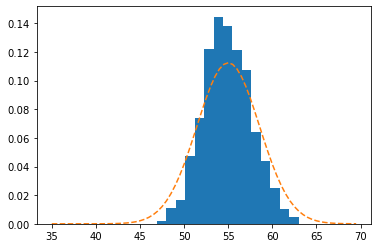

In [183]:
# Построим гистограмму и нарисуем функцию плотности для выборки - 10
mu = M
sigma = (D / n[1])**0.5
ox = steps
oy = np.array(stats.norm(loc = M, scale = D).pdf(ox))
plt.hist(samples[1000:2000], bins = 15, density = True)
plt.plot(ox, oy, linestyle = 'dashed')
plt.show()

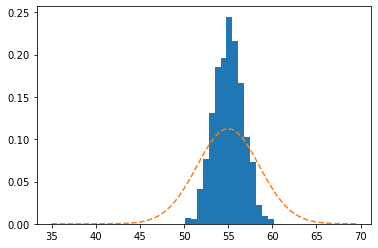

In [184]:
# Построим гистограмму и нарисуем функцию плотности для выборки - 50
mu = M
sigma = (D / n[2])**0.5
ox = steps
oy = np.array(stats.norm(loc = M, scale = D).pdf(ox))
plt.hist(samples[2000:3000], bins = 15, density = True)
plt.plot(ox, oy, linestyle = 'dashed')
plt.show()